# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [31]:
import pandas as pd

In [81]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [34]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [35]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [36]:
train.isnull().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [37]:
train = train.fillna('')

In [38]:
test.isnull().sum()

title          0
description    1
itemid         0
dtype: int64

In [39]:
test = test.fillna('')

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

Сказали, что можно взять подвыборку 100к строк, так что...

In [40]:
train = train.iloc[400000:500000]

In [41]:
train['title + description'] = train['title'] + ' ' + train['description']

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [42]:
target = train['Category']

In [43]:
num_classes = len(set(target))
print("Нужно предсказать", num_classes, "уникальных классов")

Нужно предсказать 50 уникальных классов


In [44]:
import matplotlib.pyplot as plt

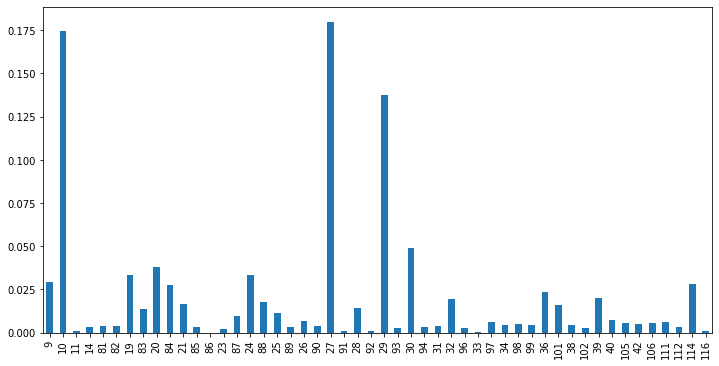

In [45]:
plt.figure(figsize=(12, 6))

target_value_counts = target.value_counts(sort = False)
target_norm = target_value_counts/target.size

target_norm.plot.bar()
plt.show()

(На полной выборке картина примерно такая же). Есть несколько классов, которые составляют очень большую долю, а также в целом можно оставшиеся классы поделить на условные две группы: с долей около 0.025 и с долей до ~0.025/4. Самую большую долю имеет класс с номером 27: 17971/100000. Самую маленькую --- с номером 86: 2/100000 (посчитала вручную, запросив значения через target.value_counts(). Удалила эти запросы, чтобы не загружать тетрадь). Те классы, которых мало, специфичные, а те, которых много, правда популярные.

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [50]:
train_feat = train['title + description']

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
cnt_vec = CountVectorizer()
train_matrix = cnt_vec.fit_transform(train_feat)

In [53]:
train_matrix.shape

(100000, 227706)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [54]:
keys = list(cnt_vec.vocabulary_.keys())

In [55]:
dig = '0123456789'

In [56]:
digits = [key for key in keys if key[0] in dig]

In [57]:
len(digits)

32882

In [58]:
from string import punctuation
punct = punctuation + '«»' + '—' # может, и есть еще что-то экзотичное, кроме стандартного из стринга и кавычек-елочек, 
                           # но показалось неразумным тратить вычисления на их поиски

In [59]:
punctuation = [key for key in keys if key[0] in punct]

In [60]:
len(punctuation)

147

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [61]:
demo = train['description'].iloc[0] # для демонстрации на самом первом описании товара в датасете

In [62]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KOTIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
def my_tokenizer(s):
    # Приведет все буквы к нижнему регистру
    s = s.lower()
    
    # Разобьет текст на токены с помощью word_tokenizer из пакета nltk
    tokens = word_tokenize(s)
    
    # Удалит все токены содержащие числа и пунктуацию
    punct_nums = set(punct + dig) # уже запоминали эти значения в предыдущем разделе
    tokens = [token for token in tokens if set(token) & punct_nums == set()]
    
    # Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
    stop = set(stopwords.words('russian'))
    tokens = list(set(tokens) - stop)
    
    # Проведет стемминг с помощью SnowballStemmer
    stemmer = SnowballStemmer('russian', 'english')
    tokens = [stemmer.stem(w) for w in tokens]
    
    return tokens

In [64]:
my_tokenizer(demo) # демонстрирую

['пиш', 'р', 'смс', 'сапожк', 'отвеча', 'кроссовк', 'звон', 'прод']

In [80]:
import time 
start_time = time.time()
tokens_train_feat = train_feat.apply(my_tokenizer)
print("--- %s seconds ---" % (time.time() - start_time))

--- 223.18040466308594 seconds ---


Даже лучше, чем у мастера!!!

Кажется, эти вычисления надо было делать не здесь...

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

Возьму 100т строк, как говорилось в объявлении про домашку (уже взяла). Замечу, что строю каунт_векторайзер только по названию и описанию, потому что таргет --- категория --- является числом, а числа мы выкидываем в токейназере. Поэтому смысла обрабатывать этот столбец нет.

In [66]:
cnt_vec = CountVectorizer(tokenizer = my_tokenizer)
train_matrix = cnt_vec.fit_transform(train_feat)

Теперь нам надо разбить полученное в отношении 4:1. Сделаю в общем виде: посчитаю, какого размера одна часть при делении на 5 частей, и возьму трейн как четыре такие части.

In [67]:
train_matrix_size_one = train_matrix.shape[0]//5
train_size = train_matrix_size_one * 4

In [68]:
test_matrix = train_matrix[train_size:]
test_target = target.iloc[train_size:]
train_matrix = train_matrix[:train_size]
train_target = target.iloc[:train_size]

Теперь обучим SGDClassifier:

In [69]:
# сначала все сделаю по красоте
from sklearn.preprocessing import MaxAbsScaler

In [70]:
scaler = MaxAbsScaler()
train_matrix = scaler.fit_transform(train_matrix)
test_matrix = scaler.transform(test_matrix)

In [71]:
from sklearn.linear_model import SGDClassifier

In [72]:
clf = SGDClassifier(max_iter=1000)
clf.fit(train_matrix, train_target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
# посчитайте метрику accuracy
from sklearn.metrics import accuracy_score

In [74]:
# посчитайте метрику accuracy
from sklearn.metrics import accuracy_score

pred = clf.predict(test_matrix)
accuracy = accuracy_score(test_target, pred)
print(accuracy)

0.83025


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer = my_tokenizer)
train_matrix = vec.fit_transform(train_feat)
train_matrix_tf_size = train_matrix.shape

train_matrix_size_one = train_matrix.shape[0]//5
train_size = train_matrix_size_one * 4

test_matrix = train_matrix[train_size:]
test_target = target.iloc[train_size:]
train_matrix = train_matrix[:train_size]
train_target = target.iloc[:train_size]

scaler = MaxAbsScaler()
train_matrix = scaler.fit_transform(train_matrix)
test_matrix = scaler.transform(test_matrix)

clf = SGDClassifier(max_iter=1000)
clf.fit(train_matrix, train_target)

pred = clf.predict(test_matrix)
accuracy = accuracy_score(test_target, pred)
print(accuracy)

0.8425


Качество улучшилось! Теперь сделаем второе задание.

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer = my_tokenizer, max_df = 0.9)
train_matrix = vec.fit_transform(train_feat)
train_matrix_size = train_matrix.shape

train_matrix_size_one = train_matrix.shape[0]//5
train_size = train_matrix_size_one * 4

test_matrix = train_matrix[train_size:]
test_target = target.iloc[train_size:]
train_matrix = train_matrix[:train_size]
train_target = target.iloc[:train_size]

scaler = MaxAbsScaler()
train_matrix = scaler.fit_transform(train_matrix)
test_matrix = scaler.transform(test_matrix)

clf = SGDClassifier(max_iter=1000)
clf.fit(train_matrix, train_target)

pred = clf.predict(test_matrix)
accuracy = accuracy_score(test_target, pred)
print(accuracy)

0.8434


In [77]:
print(train_matrix_size, train_matrix_tf_size)

(100000, 91315) (100000, 91315)


Размеры матриц не изменились, а качество еще улучшилось!

In [79]:
# второе задание с другим max_df просто так на будущее...

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer = my_tokenizer, max_df = 0.85)
train_matrix = vec.fit_transform(train_feat)
train_matrix_size = train_matrix.shape

train_matrix_size_one = train_matrix.shape[0]//5
train_size = train_matrix_size_one * 4

test_matrix = train_matrix[train_size:]
test_target = target.iloc[train_size:]
train_matrix = train_matrix[:train_size]
train_target = target.iloc[:train_size]

scaler = MaxAbsScaler()
train_matrix = scaler.fit_transform(train_matrix)
test_matrix = scaler.transform(test_matrix)

clf = SGDClassifier(max_iter=1000)
clf.fit(train_matrix, train_target)

pred = clf.predict(test_matrix)
accuracy = accuracy_score(test_target, pred)
print(accuracy)

0.84335


## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков, называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [78]:
from sklearn.feature_extraction.text import HashingVectorizer

vec = HashingVectorizer(tokenizer = my_tokenizer, n_features = 30000)
train_matrix = vec.fit_transform(train_feat)

train_matrix_size_one = train_matrix.shape[0]//5
train_size = train_matrix_size_one * 4

test_matrix = train_matrix[train_size:]
test_target = target.iloc[train_size:]
train_matrix = train_matrix[:train_size]
train_target = target.iloc[:train_size]

scaler = MaxAbsScaler()
train_matrix = scaler.fit_transform(train_matrix)
test_matrix = scaler.transform(test_matrix)

clf = SGDClassifier(max_iter=1000)
clf.fit(train_matrix, train_target)

pred = clf.predict(test_matrix)
accuracy = accuracy_score(test_target, pred)
print(accuracy)

0.83195


Самый высокий результат --- tf-idf с max_df = 0.9.

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

Прочекала пару вариаций, стало только хуже с ними. Обучу на tf-idf с max_df = 0.9.
Хочу сбалансированную выборку.

Cначала посмотрю на сбалансированную выборку снова для train.

In [82]:
target_val = set(target.unique())

new_train = train.loc[:2]
for i in target_val:
    if train['Category'].value_counts().loc[i] < 400:
        new_train = new_train.append(train[train['Category'] == i])
        new_train = new_train.append(train[train['Category'] == i])
        new_train = new_train.append(train[train['Category'] == i])
        new_train = new_train.append(train[train['Category'] == i])
    elif 400 <= train['Category'].value_counts().loc[i] < 1000:
        new_train = new_train.append(train[train['Category'] == i])
        new_train = new_train.append(train[train['Category'] == i])
    elif 1000 <= train['Category'].value_counts().loc[i] < 1500:
        new_train = new_train.append(train[train['Category'] == i])
        new_train = new_train.append(train[train['Category'] == i].iloc[:500])
    elif 1500 <= train['Category'].value_counts().loc[i] < 2000:
        new_train = new_train.append(train[train['Category'] == i])
        new_train = new_train.append(train[train['Category'] == i].iloc[:250])
    else:
        new_train = new_train.append(train[train['Category'] == i].iloc[:2000])

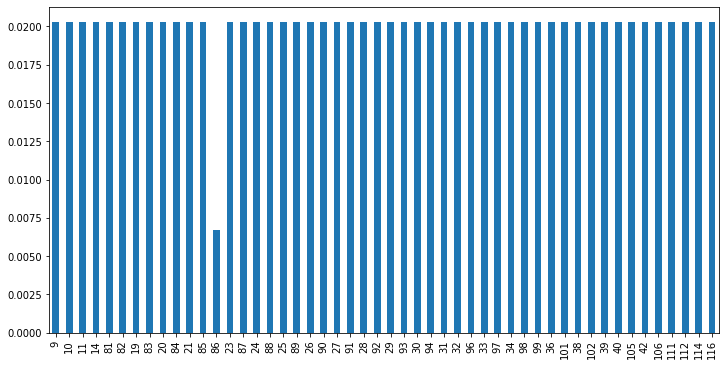

In [84]:
new_target = new_train['Category']
new_target_value_counts = new_target.value_counts(sort = False)
new_target_norm = new_target_value_counts/new_target.size

plt.figure(figsize=(12, 6))
new_target_norm.plot.bar()
plt.show()

# кажется, что сильно повторять этот класс, которого изначально не очень много, не стоит

In [ ]:
# обучение + тестирование на трейне (не успела запустить, но обучение на всей выборке ниже запустила)

shuffled_train = new_train.sample(frac=1).reset_index(drop=True) # перемешиваю, а то у меня слоенно все
shuffled_train['title + description'] = shuffled_train['title'] + ' ' + shuffled_train['description']
shuffled_target = shuffled_train['Category']

vec = TfidfVectorizer(tokenizer = my_tokenizer)
train_matrix = vec.fit_transform(shuffled_train['title + description'])

train_matrix_size_one = train_matrix.shape[0]//5
train_size = train_matrix_size_one * 4

test_matrix = train_matrix[train_size:]
test_target = new_target.iloc[train_size:]
train_matrix = train_matrix[:train_size]
train_target = new_target.iloc[:train_size]

scaler = MaxAbsScaler()
train_matrix = scaler.fit_transform(train_matrix)
test_matrix = scaler.transform(test_matrix)

clf = SGDClassifier(max_iter=1000)
clf.fit(train_matrix, train_target)

pred = clf.predict(test_matrix)
accuracy = accuracy_score(test_target, pred)
print(accuracy)

In [91]:
# обучение на всем трейне

vec = TfidfVectorizer(tokenizer = my_tokenizer)
new_train['title + description'] = new_train['title'] + ' ' + new_train['description']
train_matrix = vec.fit_transform(new_train['title + description'])

scaler = MaxAbsScaler()
train_matrix = scaler.fit_transform(train_matrix)

clf = SGDClassifier(max_iter=1000)
clf.fit(train_matrix, new_target)

pred = clf.predict(train_matrix)
accuracy = accuracy_score(new_target, pred)
print(accuracy)

0.9357915327934484


А теперь наконец сделаем предсказания на тесте!

In [ ]:
test_info = test['title'] + ' ' + test['description']
test_matrix = vec.transform(test_info)

In [ ]:
test_matrix = scaler.transform(test_matrix)

pred = clf.predict(test_matrix)
pd.DataFrame(pred).to_csv("result.csv")

Не хочу отправлять на энитаск в последний момент --- сейчас не успевает досчитаться, но, когда досчитается, загружу результат на кэггл!